# Importing Libraries

In [3]:
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random

In [4]:
%matplotlib inline

# Loading the Dataset containing Links

In [5]:
import pandas as pd

df = pd.read_csv("Book_copurchase_5k_edges.csv", nrows=5000)


In [6]:
import networkx as nx

G1 = nx.from_pandas_edgelist(df, source='Source', target='Target')


In [7]:
# if not nx.is_connected(G1):
#     components = list(nx.connected_components(G1))
#     num_components = len(components)
#     for i in range(num_components - 1):
#         G1.add_edge(list(components[i])[0], list(components[i+1])[0])


In [8]:
nx.write_edgelist(G1, "Book_copurchase_5k_edges_connected_graph.csv", delimiter=",", data=False)


In [9]:
# First 5000 edges are considered from the original dataset
edge_df=pd.read_csv('Book_copurchase_5k_edges_connected_graph.csv')
edge_df.head()

,1,2
0,1,4
1,1,5
2,1,13
3,2,10
4,2,11


# Constructing Graph and Finding Communities among the Co-Purchages

## 1. Using NetworkX

In [10]:
G=nx.Graph()
G.add_edges_from(edge_df.values.tolist())

In [11]:
# Finding the communities using the Girvan Newman algorithm
communities = girvan_newman(G)
 
node_groups = []
for com in next(communities):
    node_groups.append(list(com))

node_groups

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
 

In [12]:
communities

<generator object girvan_newman at 0x7ff34b1d49e0>

In [13]:
len(node_groups) # Total number of communities or clusters found is 51

35

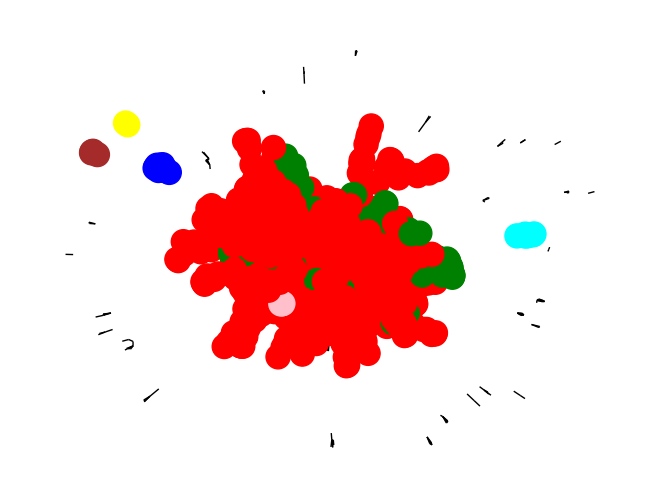

In [14]:
color_map = []

# Taking only 7 groups out of 51
for node in G:
    if node in node_groups[0]:
        color_map.append('red')
    elif node in node_groups[1]:
        color_map.append('blue')
    elif node in node_groups[2]:
        color_map.append('green')
    elif node in node_groups[3]:
        color_map.append('yellow')
    elif node in node_groups[4]:
        color_map.append('brown')
    elif node in node_groups[5]:
        color_map.append('pink')
    elif node in node_groups[6]:
        color_map.append('cyan')
    else:
        color_map.append('#FF000000')
        
# Visualizing Communities represented by different colors
nx.draw(G, node_color=color_map,)
plt.show()

## 2. Finding Communities using igram

In [15]:
pip install python-igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import igraph
from igraph import *

In [17]:
# Reading the Amazon product co-purchase dataset
data = pd.read_csv('/content/Book_copurchase_5k_edges_connected_graph.csv', header=None, names=['source', 'target'])

# Extracting the edge list from the dataset
edge_list = list(zip(data['source'], data['target']))


In [18]:
# igram indices start from 0, so edge list is transformed
edge_list_igraph = [[y-1 for y in x] for x in edge_list]
edge_list_igraph

[[0, 1],
 [0, 3],
 [0, 4],
 [0, 12],
 [1, 9],
 [1, 10],
 [1, 11],
 [3, 13],
 [3, 14],
 [3, 15],
 [3, 59],
 [3, 60],
 [3, 61],
 [3, 91],
 [3, 92],
 [3, 232],
 [3, 341],
 [3, 478],
 [3, 479],
 [3, 1196],
 [4, 5],
 [4, 6],
 [4, 7],
 [4, 8],
 [4, 117],
 [4, 128],
 [4, 464],
 [4, 1401],
 [12, 55],
 [12, 56],
 [12, 57],
 [12, 58],
 [12, 87],
 [12, 89],
 [12, 148],
 [12, 243],
 [12, 245],
 [12, 400],
 [12, 401],
 [12, 1172],
 [9, 5],
 [9, 7],
 [9, 16],
 [9, 19],
 [9, 20],
 [9, 35],
 [9, 36],
 [9, 37],
 [9, 45],
 [9, 46],
 [9, 72],
 [9, 216],
 [9, 217],
 [9, 218],
 [9, 318],
 [9, 393],
 [9, 394],
 [9, 424],
 [9, 1180],
 [10, 211],
 [10, 212],
 [10, 213],
 [10, 214],
 [10, 215],
 [10, 503],
 [10, 1166],
 [11, 6],
 [11, 16],
 [11, 17],
 [11, 118],
 [11, 119],
 [11, 21],
 [11, 65],
 [11, 150],
 [11, 164],
 [11, 165],
 [11, 191],
 [11, 360],
 [11, 372],
 [11, 433],
 [11, 481],
 [11, 1062],
 [2, 50],
 [2, 51],
 [2, 52],
 [2, 53],
 [2, 54],
 [50, 24],
 [50, 51],
 [50, 80],
 [50, 81],
 [50, 52],
 [50

In [19]:
# defining the graph and adding edges & vertices; stored in adjancency list
g2 = Graph()
g2.add_vertices(5000)
g2.add_edges(edge_list_igraph)
print(g2)

IGRAPH U--- 5000 3846 --
+ edges:
0--1 0--3 0--4 0--12 1--9 1--10 1--11 3--13 3--14 3--15 3--59 3--60 3--61
3--91 3--92 3--232 3--341 3--478 3--479 3--1196 4--5 4--6 4--7 4--8 4--117
4--128 4--464 4--1401 12--55 12--56 12--57 12--58 12--87 12--89 12--148
12--243 12--245 12--400 12--401 12--1172 5--9 7--9 9--16 9--19 9--20 9--35
9--36 9--37 9--45 9--46 9--72 9--216 9--217 9--218 9--318 9--393 9--394 9--424
9--1180 10--211 10--212 10--213 10--214 10--215 10--503 10--1166 6--11 11--16
11--17 11--118 11--119 11--21 11--65 11--150 11--164 11--165 11--191 11--360
11--372 11--433 11--481 11--1062 2--50 2--51 2--52 2--53 2--54 24--50 50--51
50--80 50--81 50--52 50--53 50--54 50--82 50--83 50--146 50--147 50--249
50--282 50--306 50--307 50--415 50--431 50--432 50--508 50--1048 51--53
51--229 51--230 51--329 51--432 52--53 52--81 52--82 52--83 52--329 52--432
53--329 53--432 24--54 54--100 54--231 54--296 54--845 54--1336 13--15 13--59
13--61 13--60 13--91 5--14 6--14 14--24 14--25 14--68 14--69

In [20]:
# Nodes with zero degree are removed from adjacency list
to_delete_ids = [v.index for v in g2.vs if v.degree() == 0]
g2.delete_vertices(to_delete_ids)

In [21]:
print(g2)

IGRAPH U--- 1963 3846 --
+ edges:
   0 --    1    3    4   12
   1 --    0    9   10   11
   2 --   50   51   52   53   54
   3 --    0   13   14   15   59   60   61   91   92  232  341  478  479 1193
   4 --    0    5    6    7    8  117  128  464 1398
   5 --    4    6    7    9   14   16  128  464  505  861 1062 1438
   6 --    4    5   11   14   16   17   18   24   32   66   80   81   94   97
136  159  174  188  189  237  246  253  255  359  362  377  397  456  505  515
517  518  544  595  771
   7 --    4    5    9   24   25  100  117  140 1012 1372
   8 --    4  116  117  379
   9 --    1    5    7   16   19   20   35   36   37   45   46   72  216  217
218  318  393  394  424 1177
  10 --    1  211  212  213  214  215  503 1163
  11 --    1    6   16   17   21   65  118  119  150  164  165  191  360  372
433  481 1059
  12 --    0   55   56   57   58   87   89  148  243  245  400  401 1169
  13 --    3   15   59   60   61   91
  14 --    3    5    6   24   25   68   69  140
  15 

In [22]:
# created commmunities based on edge betweeness
v = g2.community_edge_betweenness(directed=True)
print(v)

Dendrogram, 1963 elements, 1929 merges


In [23]:
# groupping the nodes into clusters with cluster indices
cluster1 = v.as_clustering()
print(cluster1)

Clustering with 1963 elements and 78 clusters
[ 0] 0, 1, 4, 5, 7, 8, 9, 16, 19, 20, 26, 29, 35, 36, 37, 39, 45, 46, 72, 116,
     117, 126, 128, 129, 173, 174, 216, 217, 218, 219, 224, 301, 302, 303,
     304, 318, 355, 393, 394, 395, 424, 437, 438, 464, 465, 466, 603, 604,
     609, 611, 612, 681, 682, 744, 745, 746, 860, 861, 1067, 1068, 1177, 1268,
     1269, 1270, 1579, 1689, 1690, 1761, 1785, 1786, 1819
[ 1] 2, 50, 51, 52, 53, 80, 81, 82, 83, 111, 146, 147, 180, 229, 231, 249,
     282, 291, 293, 306, 307, 329, 340, 364, 365, 431, 432, 441, 454, 455,
     495, 506, 507, 508, 566, 567, 630, 631, 698, 751, 752, 825, 905, 1003,
     1004, 1045, 1046, 1047, 1178, 1196, 1197, 1204, 1205, 1313, 1314, 1332,
     1386, 1387, 1388, 1389, 1397, 1492, 1559, 1560, 1755, 1756, 1791, 1792,
     1793, 1871, 1872, 1911, 1912, 1913, 1941, 1942, 1943
[ 2] 3, 13, 15, 59, 60, 61, 90, 91, 92, 104, 105, 106, 107, 114, 115, 162,
     232, 341, 350, 478, 479, 662, 1193, 1930
[ 3] 6, 18, 32, 33, 34, 65, 6

In [24]:
# modularity value
cluster1.modularity

0.8931468803213906

In [25]:
# membership list : which cluster each node belongs
cluster1.membership

[0,
 0,
 1,
 2,
 0,
 0,
 3,
 0,
 0,
 0,
 4,
 5,
 6,
 2,
 7,
 2,
 0,
 5,
 3,
 0,
 0,
 5,
 5,
 8,
 9,
 7,
 0,
 10,
 11,
 0,
 12,
 12,
 3,
 3,
 3,
 0,
 0,
 0,
 9,
 0,
 13,
 11,
 11,
 11,
 10,
 0,
 0,
 11,
 11,
 11,
 1,
 1,
 1,
 1,
 9,
 6,
 6,
 5,
 6,
 2,
 2,
 2,
 5,
 5,
 5,
 3,
 14,
 3,
 7,
 7,
 12,
 12,
 0,
 9,
 11,
 11,
 10,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 5,
 5,
 6,
 6,
 6,
 6,
 2,
 2,
 2,
 5,
 5,
 5,
 12,
 12,
 10,
 15,
 16,
 16,
 6,
 5,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 1,
 15,
 6,
 2,
 2,
 0,
 0,
 5,
 5,
 5,
 8,
 8,
 8,
 8,
 8,
 0,
 17,
 0,
 0,
 9,
 11,
 14,
 14,
 11,
 11,
 3,
 7,
 7,
 7,
 7,
 18,
 12,
 9,
 9,
 10,
 1,
 1,
 6,
 5,
 5,
 16,
 16,
 16,
 5,
 5,
 15,
 15,
 10,
 10,
 15,
 10,
 2,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 17,
 17,
 17,
 0,
 0,
 19,
 18,
 20,
 18,
 18,
 1,
 5,
 21,
 5,
 5,
 21,
 10,
 10,
 22,
 3,
 3,
 5,
 17,
 5,
 5,
 21,
 21,
 22,
 22,
 10,
 22,
 5,
 17,
 17,
 21,
 22,
 5,
 5,
 17,
 17,
 5,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 5,
 12,
 12,
 12,
 0,
 13,
 13,
 13,
 13,
 1,
 

In [26]:
# Assigning differnt colors to the nodes belonging to same cluster
color_palletes = igraph.drawing.colors.ClusterColoringPalette(len(cluster1))
g2.vs['color'] = color_palletes.get_many(cluster1.membership)

<Axes: >

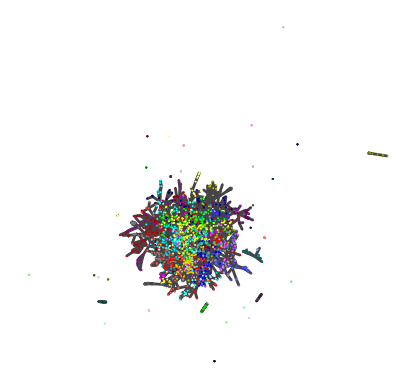

In [27]:
# visualization in another form of layout
fig, ax = plt.subplots()
igraph.plot(g2, layout= g2.layout_fruchterman_reingold(),
            vertex_frame_width=0,
            target = ax)